### Data from https://www.kaggle.com/blastchar/telco-customer-churn

### Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display
import pickle 

## Reading The Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Data Preparation

In [5]:
len(df)

7043

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
#There are space without any values in the "TotalCharges" column and the data type is object.
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

In [9]:
#Change the type of the churn column bolean values from (YES or NO) >>>> (1 or 0)
df.churn = (df.churn == 'Yes').astype(int)

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [11]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [12]:
df.churn.value_counts(normalize = True )

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [13]:
df.churn.mean()

0.2653698707936959

## Exploratory Data Analysis

In [14]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [15]:
categorical =  list(df.select_dtypes(include = ['object']).columns) 
numerical = list(df.select_dtypes(include = ['number']).columns)

In [16]:
categorical.remove('customerid')
numerical.remove('churn')

In [17]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [18]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

## Examine Features

### Using Risk Ratio 
#### risk ratio = group ratio/ global ratio
##### a group with a risk close to 1 not risky at all
##### a group with a risk lower than 1; the clients in this group are less likely to churn than clients in general
##### a group with a risk higher than 1; there is churn in the group more than in the population 

In [19]:
global_mean = df.churn.mean()
round(global_mean, 2)

0.27

In [20]:
churn_gender = df.groupby('gender').churn.mean()
churn_gender

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

The difference between rates is small; The values is no important when predicting churn

In [21]:
churn_partner = df.groupby('partner').churn.mean()
churn_partner

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [22]:
churn_partner / global_mean

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [23]:
for feature in categorical:
    df_group = df.groupby(by=feature).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rik'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rik
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,mean,diff,rik
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,rik
partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,mean,diff,rik
dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,mean,diff,rik
phoneservice,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,mean,diff,rik
multiplelines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,mean,diff,rik
internetservice,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,mean,diff,rik
onlinesecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,mean,diff,rik
onlinebackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,mean,diff,rik
deviceprotection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,mean,diff,rik
techsupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,mean,diff,rik
streamingtv,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,mean,diff,rik
streamingmovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,mean,diff,rik
contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,mean,diff,rik
paperlessbilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,mean,diff,rik
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


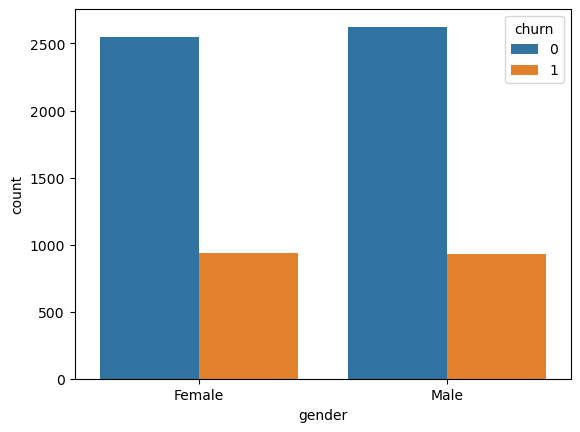

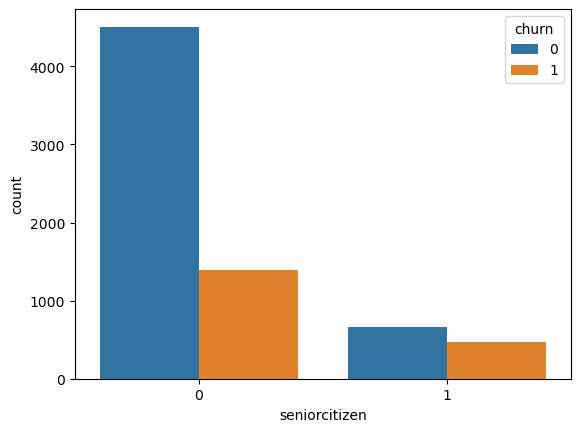

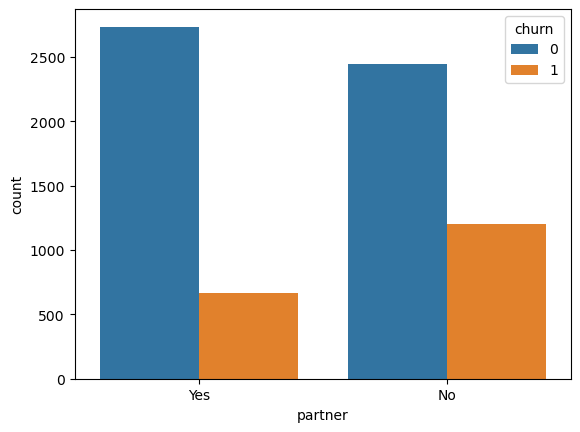

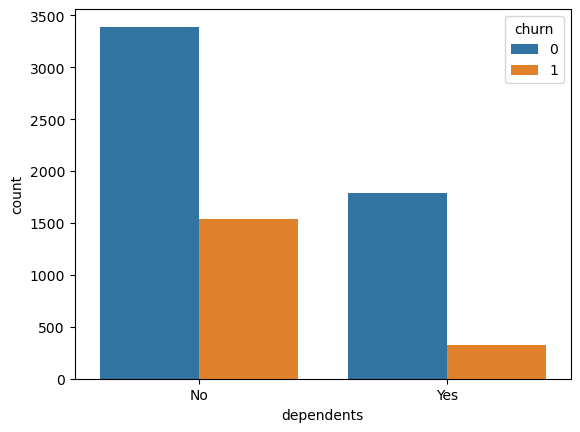

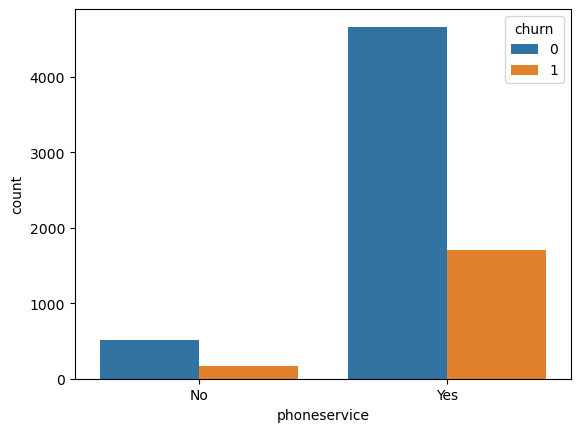

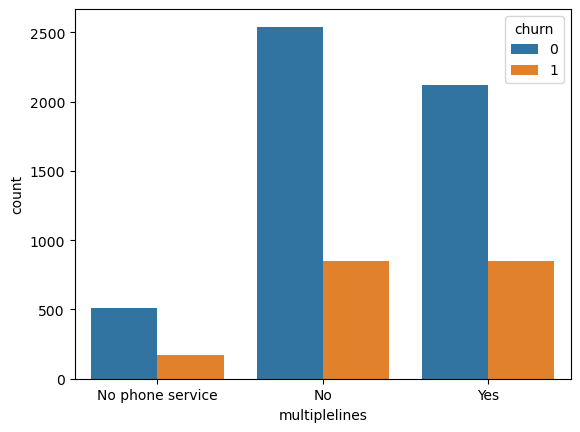

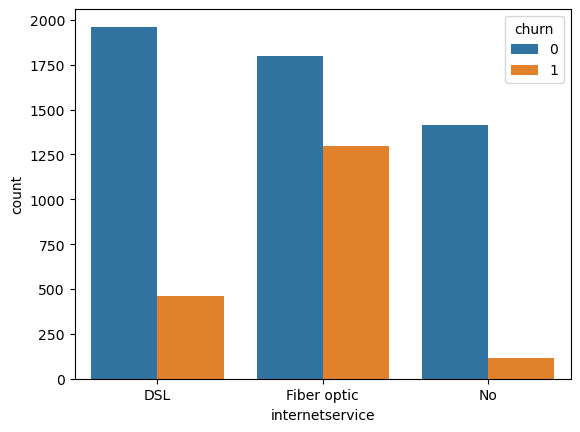

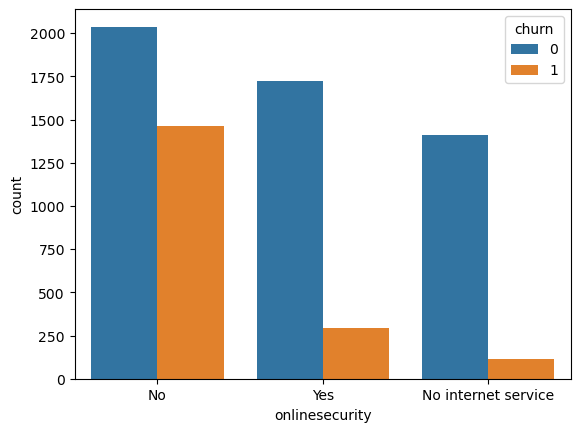

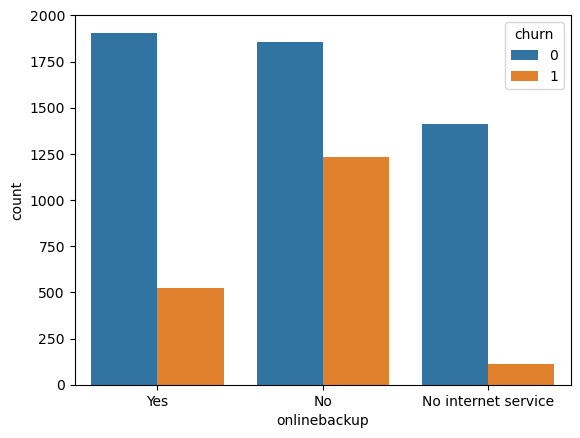

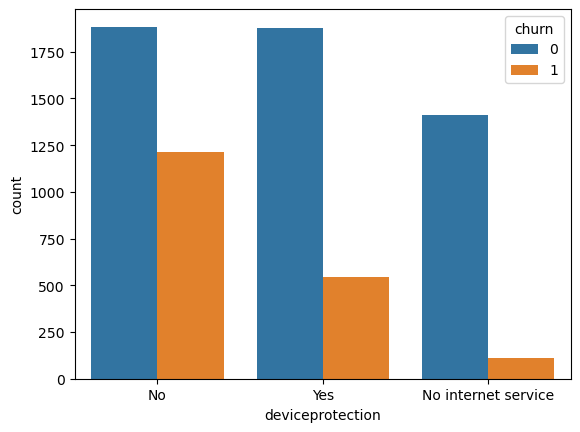

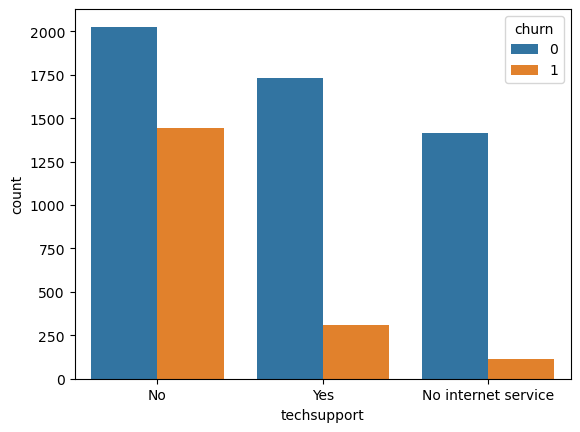

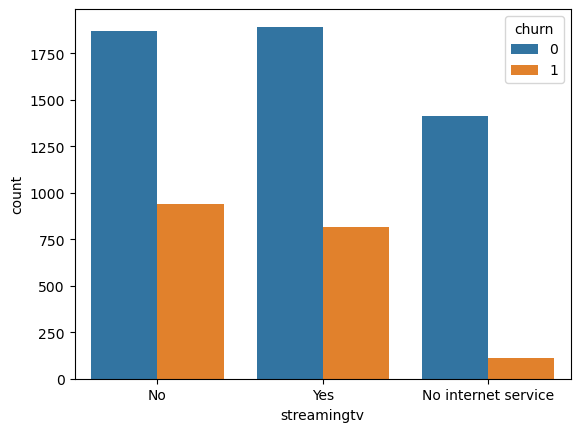

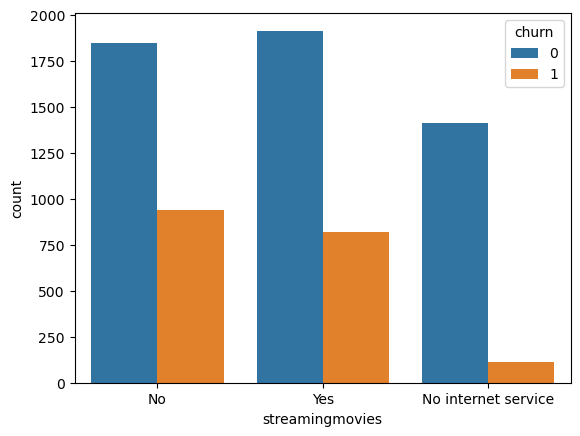

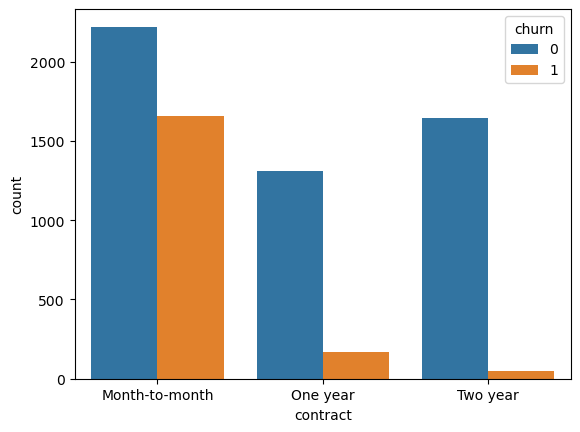

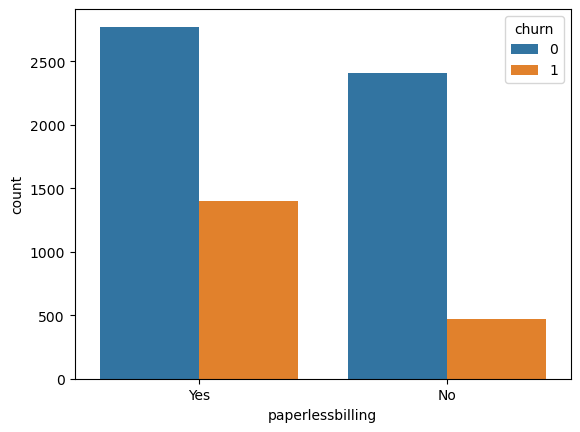

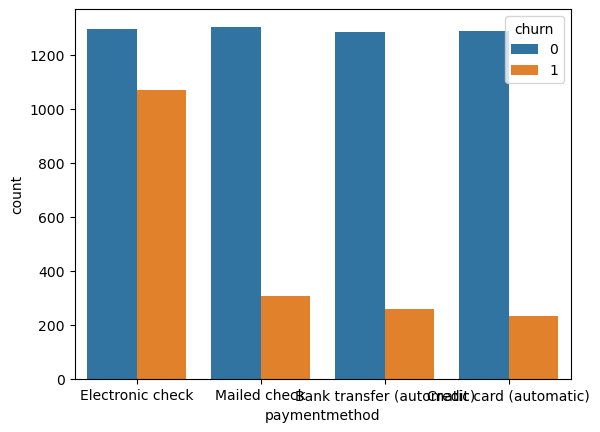

In [24]:
for feature in categorical:
    sns.countplot(x=feature, hue='churn', data=df)
    plt.show()

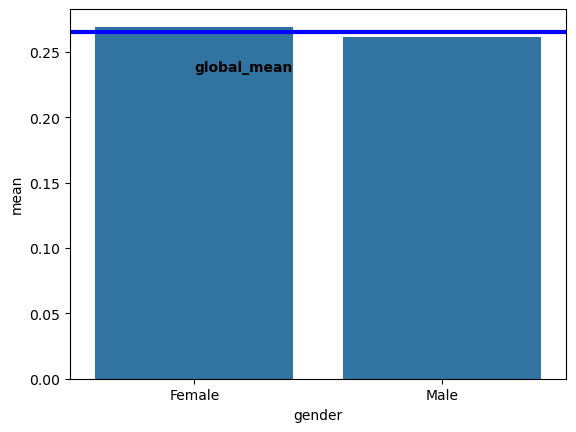

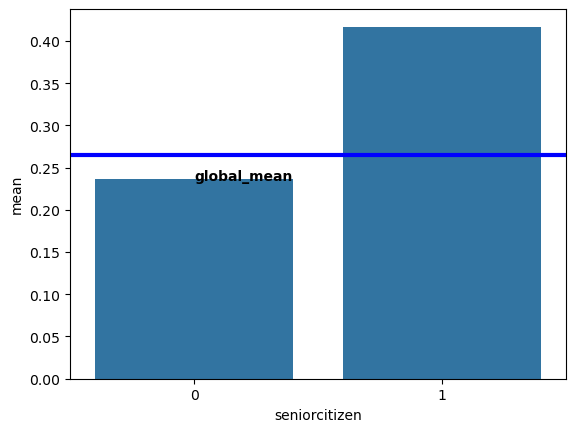

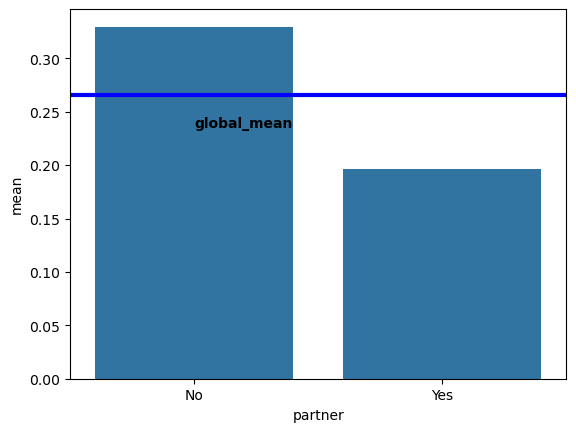

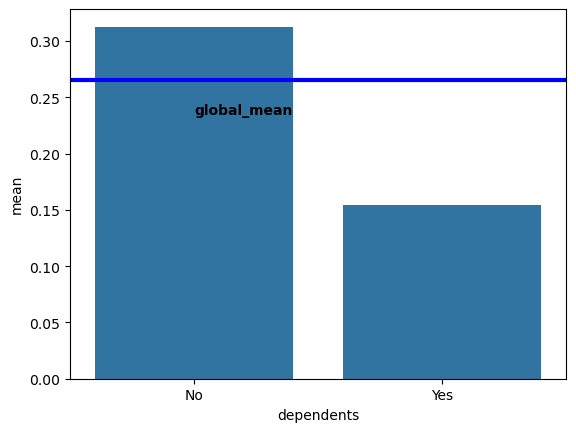

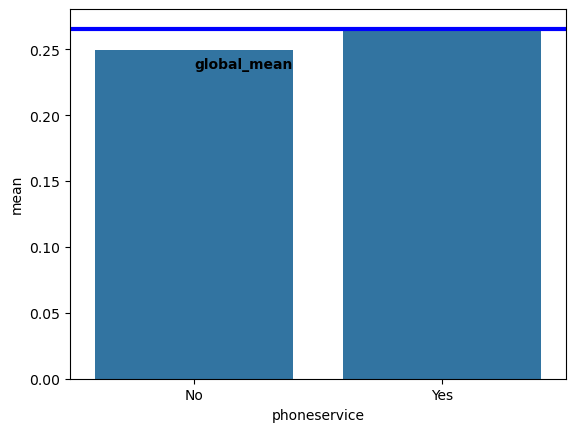

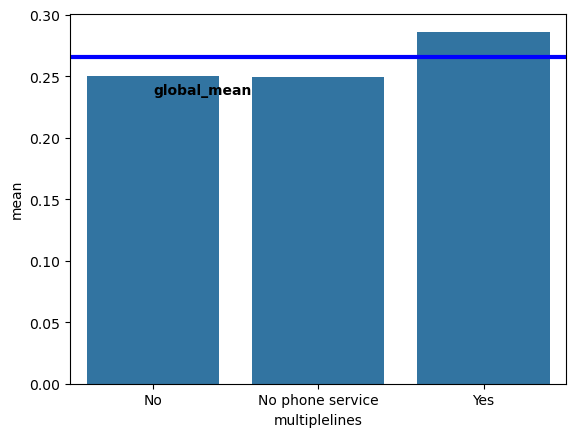

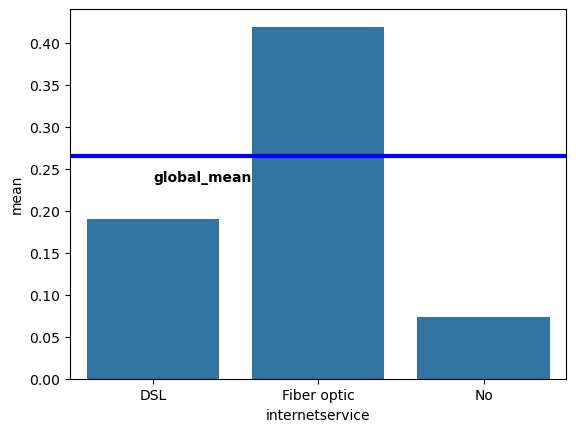

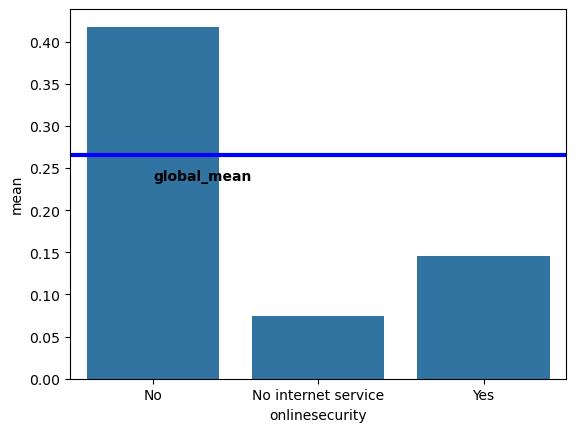

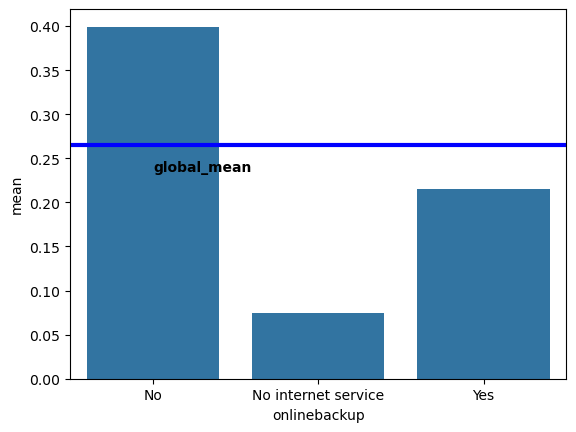

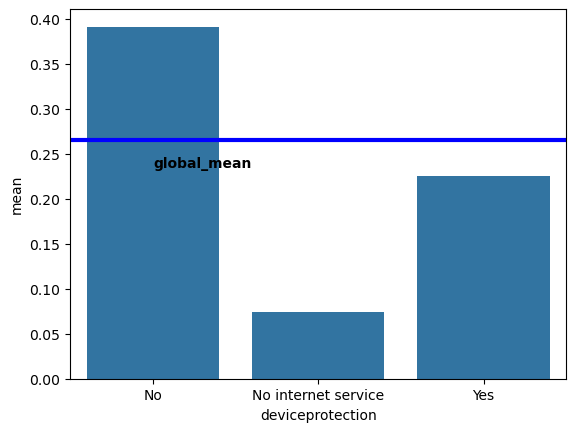

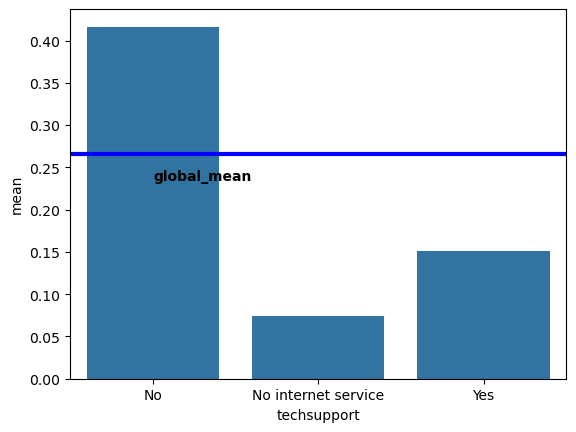

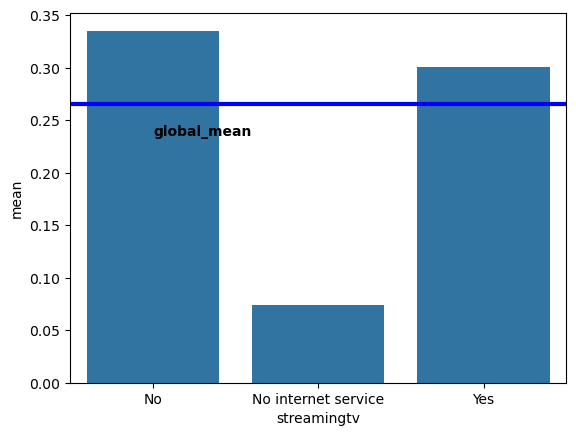

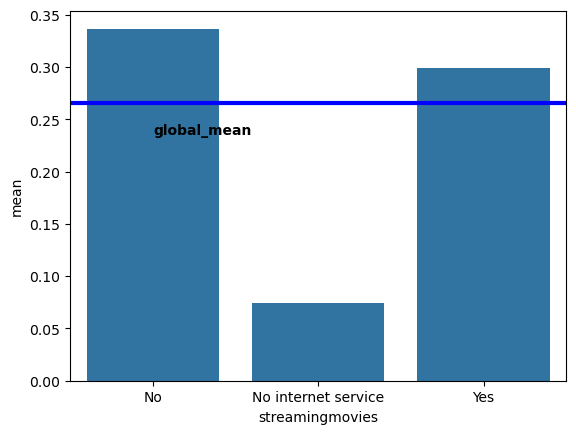

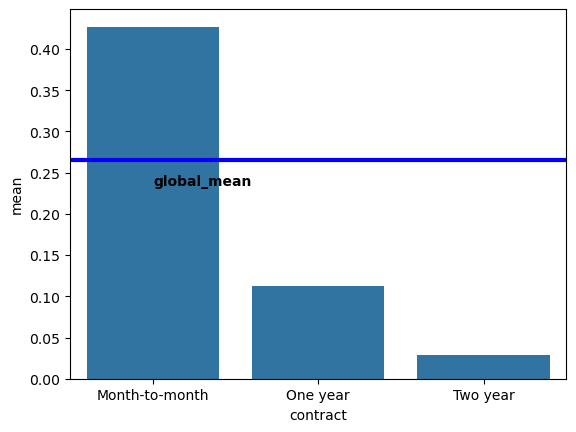

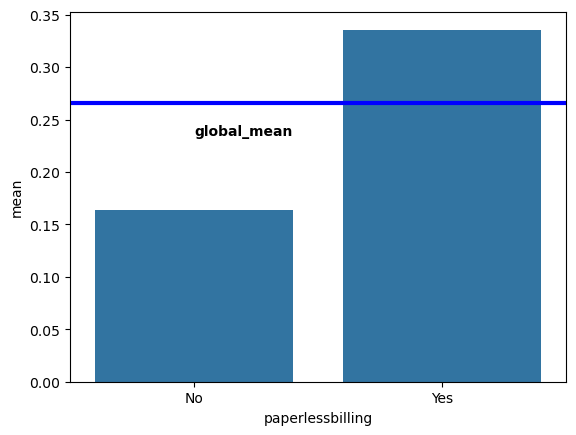

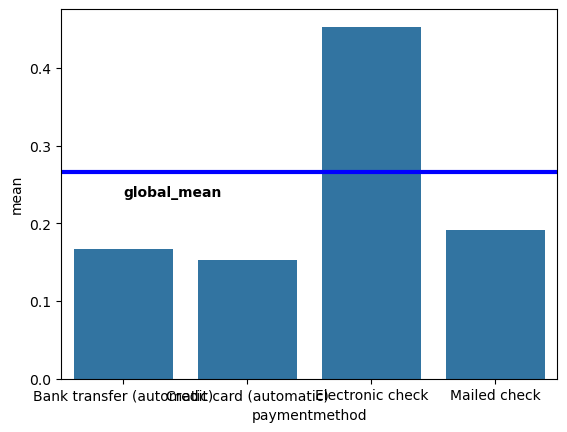

In [25]:
for feature in categorical:
    df_group = df.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph = sns.barplot(x=feature, y='mean', data=df_group)
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='Black', weight='semibold')
    plt.show()

In [26]:
def calculate_mi(series):
    return mutual_info_score(series, df.churn)

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792


,MI
partner,0.011454
seniorcitizen,0.010577
multiplelines,0.000801
phoneservice,0.000072
gender,0.000037


In [27]:
df[numerical].corrwith(df.churn).to_frame('correlation')

,correlation
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.198324


In [28]:
df.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.569965,61.265124,2549.911442
1,17.979133,74.441332,1531.796094


## Data Preprocessing

## Handling Categorical Variables "One-Hot Encoding" + Scaling Numerical Variables Standard Scaler

In [29]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_train_full, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 21)
Validation Data Size:  (1127, 21)
Testing Data Size:  (1409, 21)


In [30]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [31]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [32]:
X_train

array([[-0.08151035, -1.48282956, -0.71722818, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17241991, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39643222, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.9107065 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.6563381 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66091931, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

## Modelling

### Logistic Regression

In [34]:
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)  # ====> Weights

LogisticRegression(random_state=1, solver='liblinear')

In [35]:
columns

array(['tenure', 'monthlycharges', 'totalcharges', 'gender_Male',
       'seniorcitizen_1', 'partner_Yes', 'dependents_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No internet service',
       'techsupport_Yes', 'streamingtv_No internet service',
       'streamingtv_Yes', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype=object)

In [36]:
model_1.coef_[0]

array([-1.55289909,  0.00683448,  0.78672391, -0.02279517,  0.16752541,
        0.08059088, -0.06853199, -0.78608866, -0.12129677,  0.24149877,
        0.75198405, -0.11424034, -0.11424034, -0.44256141, -0.11424034,
       -0.109131  , -0.11424034, -0.10780688, -0.11424034, -0.38871252,
       -0.11424034,  0.13171321, -0.11424034,  0.20732317, -0.6769035 ,
       -1.39417656,  0.34414439,  0.05186541,  0.20257224,  0.03244103])

In [37]:
y_val_pred = model_1.predict_proba(X_valid)
y_val_pred

array([[0.99290745, 0.00709255],
       [0.79852954, 0.20147046],
       [0.78731698, 0.21268302],
       ...,
       [0.96168323, 0.03831677],
       [0.42031577, 0.57968423],
       [0.70284957, 0.29715043]])

In [38]:
y_test_pred = model_1.predict_proba(X_test)
y_test_pred

array([[0.94336331, 0.05663669],
       [0.91259839, 0.08740161],
       [0.66559409, 0.33440591],
       ...,
       [0.99479554, 0.00520446],
       [0.80574647, 0.19425353],
       [0.39357498, 0.60642502]])

In [39]:
y_test_pred[:,1]

array([0.05663669, 0.08740161, 0.33440591, ..., 0.00520446, 0.19425353,
       0.60642502])

In [40]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [41]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
y_pred = model_1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [43]:
y_test_pred == y_test

3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [44]:
(y_test_pred == y_test).mean()

0.8076650106458482

In [45]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.81
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


## Repeat Training and Evaluation for Most Important Features

In [46]:
#Get the top 5 categorical features only
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [47]:
X_train, X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


## Using Numerical Features Only

In [48]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [49]:
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test  = df_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.78
LogisticRegression Testing Accuracy:  0.8


## Model Saving

In [51]:
pickle.dump(model_2, open("log_reg.pkl", 'wb'))

## Model Loading

In [53]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

## Model Usage

In [54]:
df_test[important_cat + numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [55]:
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    return transformer

In [56]:
transformer = preprocess_fit(df_train, numerical, important_cat)

In [57]:
df_test.iloc[10][important_cat + numerical]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [68]:
pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
407,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [59]:
x =transformer.transform(pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T)
x

array([[-6.32493609e-05,  9.85088758e-01,  2.77472783e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [60]:
loaded_model.predict(x)

array([0])

In [61]:
y_test.iloc[10]

0

In [62]:
x = df_test.iloc[10][important_cat + numerical].to_dict()

In [63]:
x

{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [70]:
x = pd.DataFrame(x, index=[0])
x

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [65]:
transformer.transform(x)

array([[-6.32493609e-05,  9.85088758e-01,  2.77472783e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Transformer Saving

In [66]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

# Inference

In [71]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [72]:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [73]:
pd.DataFrame(cust, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [74]:
cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [75]:
cust

array([[-6.32493609e-05,  9.85088758e-01,  2.77472783e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [76]:
model.predict(cust)[0]

0

In [78]:
if model.predict(cust)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


In [79]:
model.predict_proba(cust)[0][1]

0.49699909317960356

## Classification Metrics

In [80]:
from sklearn.metrics import classification_report

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.50      0.55       348

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

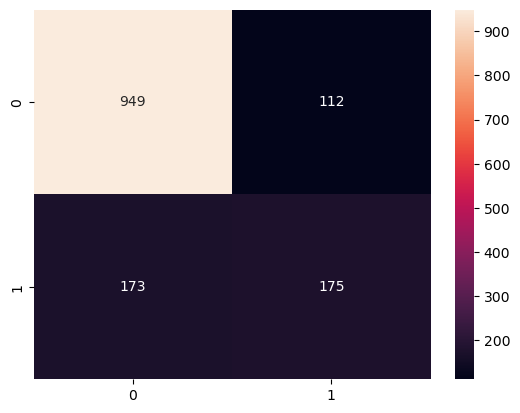

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True, fmt='0.0f')

In [82]:
cm

array([[949, 112],
       [173, 175]], dtype=int64)

In [83]:
(Tn, Fp), (Fn, Tp) = cm

In [84]:
print('True Negative: ', Tn)
print('False Positive: ', Fp)
print('False Negative: ', Fn)
print('True Positive: ', Tp)

True Negative:  949
False Positive:  112
False Negative:  173
True Positive:  175


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Accuracy:  0.7977288857345636
Precision:  0.6097560975609756
Recall:  0.5028735632183908
F1-Score:  0.5511811023622047


In [86]:
print('Precision: ', precision_score(y_test, y_pred, pos_label=0))

Precision:  0.8458110516934046


In [87]:
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))

Precision:  0.7875093312973185
